### 导入必要的库

In [1]:
import graphlab as gl
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1474521646.log


This non-commercial license of GraphLab Create for academic use is assigned to randall@mail.ustc.edu.cn and will expire on September 15, 2017.


### 定义t = 0时刻的函数

In [2]:
def f(x):
    return math.sin(2*math.pi*x)

### 定义初值条件

In [3]:
def IC(xa, xb, J, f):
    x = np.zeros(J+1)
    for i in xrange(0,J+1,1):
        x[i] = f(xa+i*1.*(xb-xa)/J)
    return x

### 定义FTCS格式

In [4]:
def FTCS(x_init, dt, dx, J, N):
    x = np.zeros([N+1, J+1])
    x[0,:] = x_init
    for i in xrange(1, N+1):
        x[i, 0] = x[i-1, 0] + 0.5*dt/dx*(x[i-1, 1] - x[i-1, J-1])
        for j in xrange(1, J):
            x[i, j] = x[i-1, j] + 0.5*dt/dx*(x[i-1, j+1] - x[i-1, j-1])
        x[i, J] = x[i-1, J] + 0.5*dt/dx*(x[i-1, 1] - x[i-1, J-1])
    return x[N,:]

### 得出结果画出图像

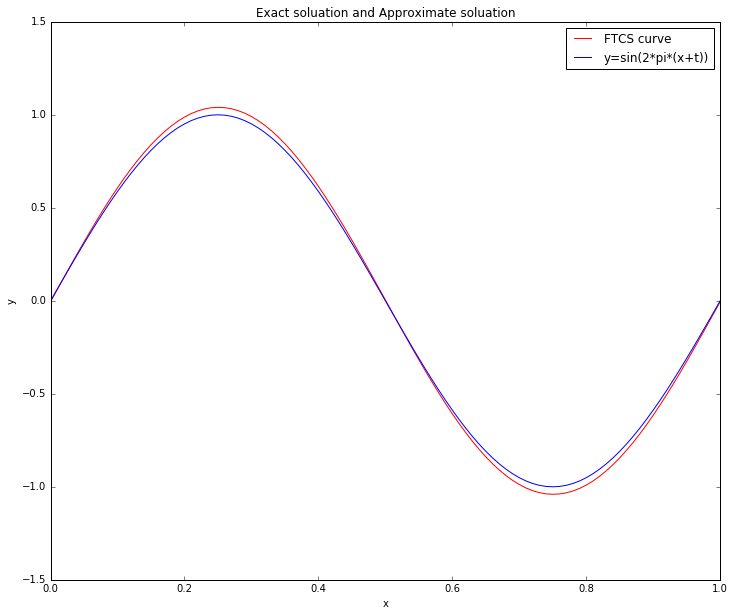

In [5]:
x = IC(0, 1, 100, f)
y = FTCS(x, 0.002, 0.01, 100, 500)
x1 = gl.SArray(np.arange(0, 1.0001, 0.01))
y1 = gl.SArray(np.arange(0, 1.0001, 0.01))
y1 = y1.apply(lambda x: math.sin(2.*math.pi*x))
plt.figure(figsize=(12, 10))
plt.plot(x1, y, 'r', label='FTCS curve')
plt.plot(x1, y1, 'b', label='y=sin(2*pi*(x+t))')
plt.title('Exact soluation and Approximate soluation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')